In [1]:
#Importing Required Libraries & Loading the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Preview the data
print(df.head())
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
#Handling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
# 3. Encoding Categorical Features

#The dataset already contains encoded categorical features:
#- `sex_male` for gender
#- `embarked_q` and `embarked_s` for embarkation ports

#So, we skip manual encoding using `get_dummies()` here.


#So, the line that caused the error is no longer needed:convert 'Sex' and 'Embarked' using get_dummies
#df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary text columns (like Name, Ticket, Cabin) if not used
#df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')




In [20]:
# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Now print them again
print(df.columns)





Index(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'sex_male', 'embarked_q', 'embarked_s'],
      dtype='object')


In [25]:
#adjust the list of numeric columns based on actual names:

num_cols = ['age', 'fare', 'sibsp', 'parch']  


In [23]:
#Normalize/Standardize Numerical Features
#Apply Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()


,passengerid,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_q,embarked_s
0,1,0,3,-0.592481,0.432793,-0.473674,-0.502445,True,False,True
1,2,1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False
2,3,1,3,-0.284663,-0.474545,-0.473674,-0.488854,False,False,True
3,4,1,1,0.407926,0.432793,-0.473674,0.420730,False,False,True
4,5,0,3,0.407926,-0.474545,-0.473674,-0.486337,True,False,True


In [24]:
#if the Scaling Worked
print(df[num_cols].mean())
print(df[num_cols].std())


age     -3.987333e-17
fare     3.987333e-18
sibsp    1.594933e-17
parch    5.283216e-17
dtype: float64
age      1.000562
fare     1.000562
sibsp    1.000562
parch    1.000562
dtype: float64


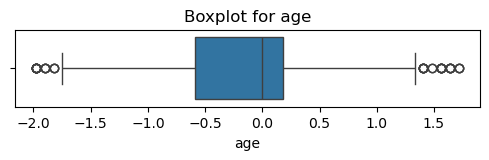

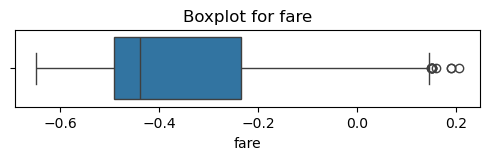

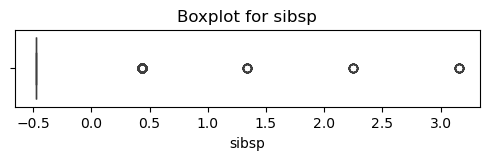

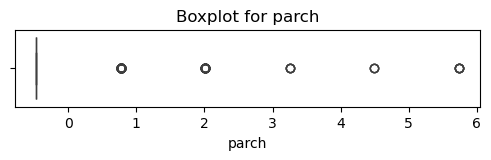

In [31]:
# Visualize
for col in num_cols:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Remove outliers using IQR 
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare'] >= Q1 - 1.5*IQR) & (df['fare'] <= Q3 + 1.5*IQR)]


Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5 * IQR) & (df['age'] <= Q3 + 1.5 * IQR)]


Q1 = df['sibsp'].quantile(0.25)
Q3 = df['sibsp'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['sibsp'] >= Q1 - 1.5 * IQR) & (df['sibsp'] <= Q3 + 1.5 * IQR)]


Q1 = df['parch'].quantile(0.25)
Q3 = df['parch'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['parch'] >= Q1 - 1.5 * IQR) & (df['parch'] <= Q3 + 1.5 * IQR)]

